# House Prices Regression

In [121]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 


In [122]:
model_df = pd.read_csv("/Users/sa17/Desktop/house-prices-regression/data/processed/newtrain.csv")

model_df

,SalePrice,MSSubClass,LotArea,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,60,8450,7,1710,2,856,2,8,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181500,20,9600,6,1262,2,1262,2,6,1976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,223500,60,11250,7,1786,2,920,2,6,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140000,70,9550,7,1717,3,961,1,7,1915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,250000,60,14260,8,2198,3,1145,2,9,2000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,175000,60,7917,6,1647,2,953,2,7,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1395,210000,20,13175,6,2073,2,2073,2,7,1978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,266500,70,9042,7,2340,1,1188,2,9,1941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,142125,20,9717,5,1078,1,1078,1,5,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression Model

In [123]:
# Declare feature vector and target variable 
X = model_df.drop(["SalePrice"], axis=1)

y = model_df["SalePrice"]

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

# Prediction Model
linear_pred = linear.predict(X_test)

# Evaluation
linear_rmse = root_mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print(f"Linear Regression RMSE: {linear_rmse:.2f}")
print(f"Linear Regression R2 Score: {linear_r2:.2f}")



Linear Regression RMSE: 22093.61
Linear Regression R2 Score: 0.85


Root Mean Squared Error measures how far the model’s predictions are, on average, from the actual SalePrice. 


R2 measures how well the model explains the variance in the data. R2 ranges from 0 t0 1 and the closer it is to 1 the better the model is.

The Linear Regression model predictions are off by about 22,093 on average.

0.85 = 85% of the variation in house prices. That’s a strong result for linear regression.

## Checking Residuals (Errors)

Making sure the residuals are normally distributed and doesn’t show any patterns

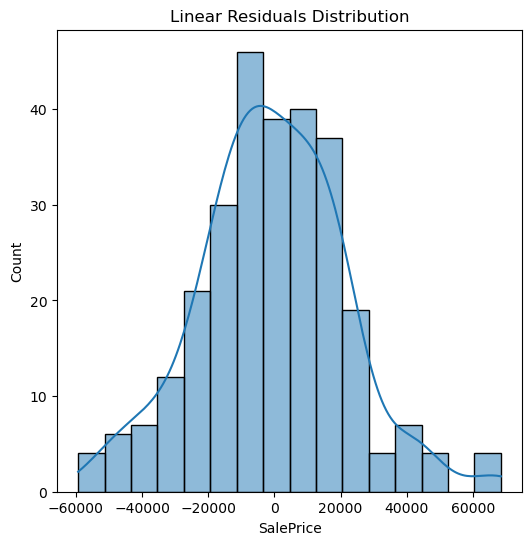

In [124]:
# Checking Residuals (errors)
linear_residuals = y_test - linear_pred

plt.figure(figsize=(6, 6))
sns.histplot(linear_residuals, kde=True)
plt.title("Linear Residuals Distribution")
plt.show()


The residuals are centered around 0, which is good. The distribution is roughly bell-shaped (normal). A small right skew and outliers, but not extreme.

The linear regression model doesn't show major bias; the residuals are well-behaved, which supports the model's predictions.

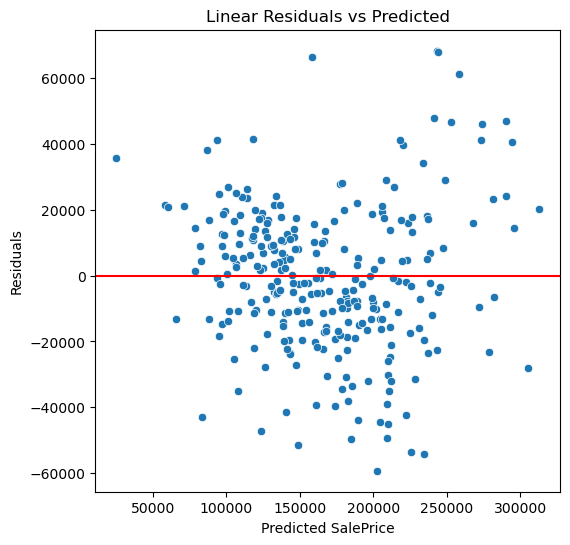

In [125]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=linear_pred, y=linear_residuals)
plt.axhline(0, color="red")
plt.title("Linear Residuals vs Predicted")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()

The spread of points is fairly random and evenly dispersed around the red line (residual = 0). No clear pattern, curve, or funnel shape.
Some outliers as its wider spread at higher predicted values, but not severe.

Linear regression is a reasonable model. The variance of errors increases slightly with higher sale prices, but nothing drastic.

## Random Forest Regressor Model

In [126]:
# Random Forest Regressor Model
random = RandomForestRegressor()
random.fit(X_train, y_train)
random.score(X_test, y_test)

# Prediction Model
random_pred = random.predict(X_test)

# Evaluation
random_rmse = root_mean_squared_error(y_test, random_pred)
random_r2 = r2_score(y_test, random_pred)

print(f"Random Forest Regressor RMSE: {random_rmse:.2f}")
print(f"Random Forest Regressor R2 Score: {random_r2:.2f}")

Random Forest Regressor RMSE: 22414.38
Random Forest Regressor R2 Score: 0.84


The Random Forest Regressor model predictions are off by about 22,414 on average.

0.84 = 84% of the variation in house prices. 

## Checking Residuals

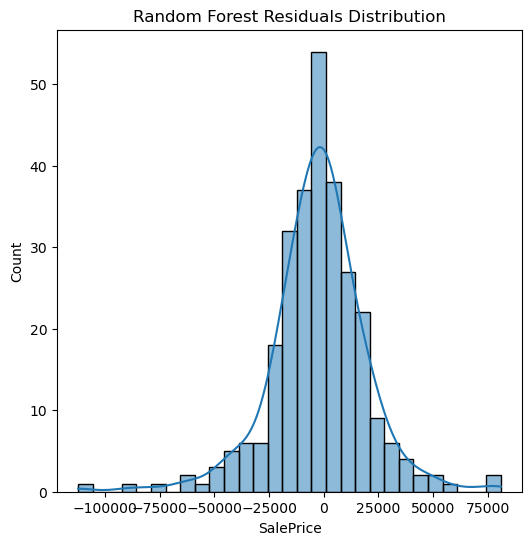

In [127]:
# Checking Residuals (errors)
random_residuals = y_test - random_pred

plt.figure(figsize=(6, 6))
sns.histplot(random_residuals, kde=True)
plt.title("Random Forest Residuals Distribution")
plt.show()

The residuals are still centered around 0 so that's good. It's a norml distribution with a slight positive skew. There are fewer extreme outliers, though still present. 

The Random Forest model is more accurate as it makes smaller errors on average, hence the tighter and taller bell shape. The model likely captures nonlinear relationships better than linear regression (which only fits straight lines).

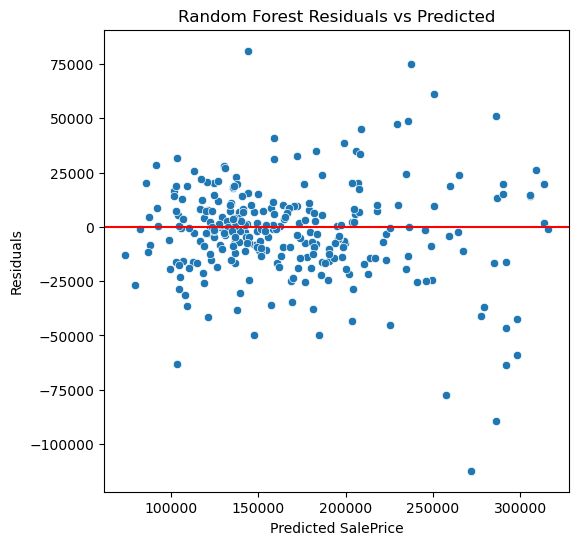

In [128]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=random_pred, y=random_residuals)
plt.axhline(0, color="red")
plt.title("Random Forest Residuals vs Predicted")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()

The spread of residuals appears fairly random and evenly dispersed around the horizontal line at zero. There is no clear pattern, curve, or funnel shape present in the residuals, which suggests that the model does not suffer from major bias. A few outliers are visible, especially at higher price ranges, but they are expected.

## Gradient Boosting Regressor Model

In [129]:
# Gradient Boosting Regressor Model
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
gradient.score(X_test, y_test)

# Prediction Model
gradient_pred = gradient.predict(X_test)

# Evaluation
gradient_rmse = root_mean_squared_error(y_test, gradient_pred)
gradient_r2 = r2_score(y_test, gradient_pred)

print(f"Gradient Boosting Regressor RMSE: {gradient_rmse:.2f}")
print(f"Gradient Boosting Regressor R2 Score: {gradient_r2:.2f}")

Gradient Boosting Regressor RMSE: 21992.52
Gradient Boosting Regressor R2 Score: 0.85


The Gradient Boosting Regressor model predictions are off by about 21,992 on average.

0.85 = 85% of the variation in house prices. 

## Checking Residuals

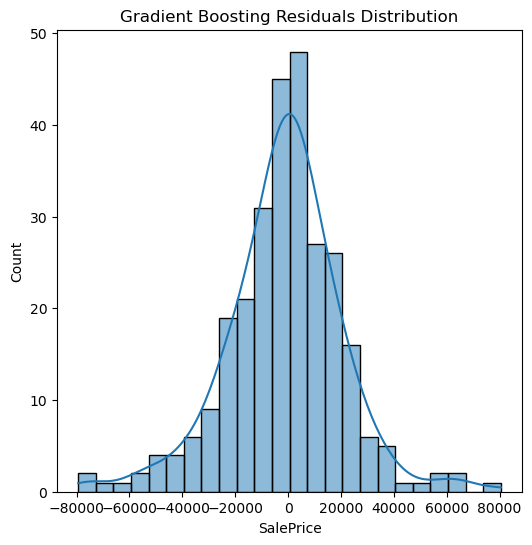

In [130]:
# Checking Residuals (errors)
gradient_residuals = y_test - gradient_pred

plt.figure(figsize=(6, 6))
sns.histplot(gradient_residuals, kde=True)
plt.title("Gradient Boosting Residuals Distribution")
plt.show()


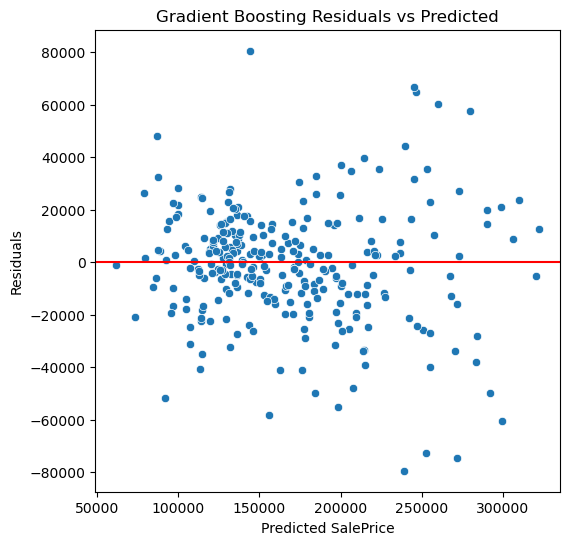

In [131]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=gradient_pred, y=gradient_residuals)
plt.axhline(0, color="red")
plt.title("Gradient Boosting Residuals vs Predicted")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()

## XGBoost Regressor Model

In [132]:
# XGBoost Regressor Model
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
xgboost.score(X_test, y_test)

# Prediction Model
xgboost_pred = xgboost.predict(X_test)

# Evaluation
xgboost_rmse = root_mean_squared_error(y_test, xgboost_pred)
xgboost_r2 = r2_score(y_test, xgboost_pred)

print(f"XGboost Regressor RMSE: {xgboost_rmse:.2f}")
print(f"XGboost Regressor R2 Score: {xgboost_r2:.2f}")

XGboost Regressor RMSE: 24978.33
XGboost Regressor R2 Score: 0.80


The XGBoost Regressor model predictions are off by about 24,978 on average.

0.80 = 80% of the variation in house prices. 

## Checking Residuals 

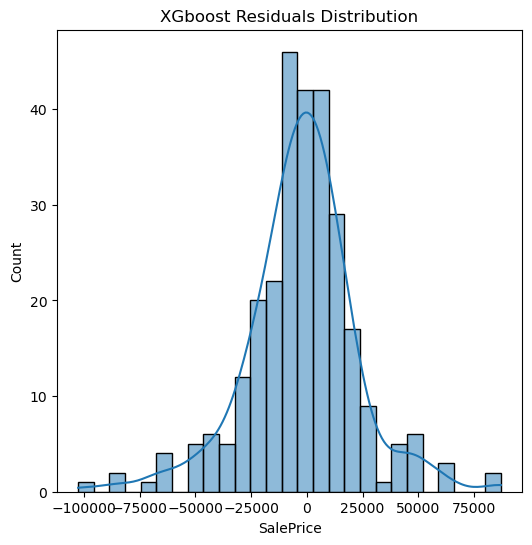

In [135]:
# Checking Residuals (errors)
xgboost_residuals = y_test - xgboost_pred

plt.figure(figsize=(6, 6))
sns.histplot(xgboost_residuals, kde=True)
plt.title("XGboost Residuals Distribution")
plt.show()

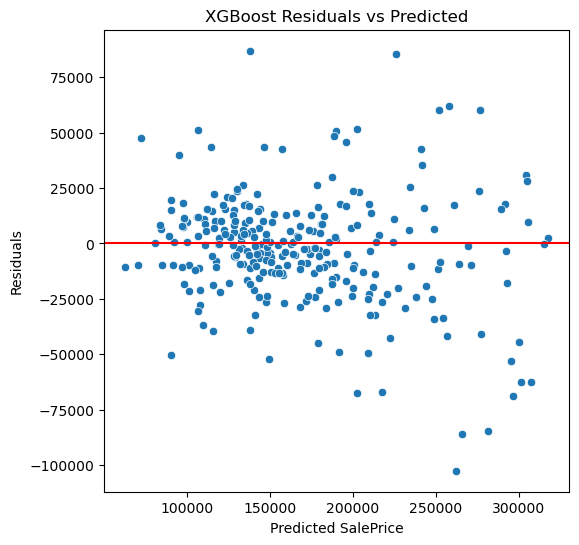

In [136]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=xgboost_pred, y=xgboost_residuals)
plt.axhline(0, color="red")
plt.title("XGBoost Residuals vs Predicted")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()